Questão 1

Dado o dataset gas.csv, carregue-o em um DataFrame e, em seguida:

1. Visualize suas cinco primeiras linhas e imprima suas colunas.

2. Obtenha a emissão mínima e máxima de gases ao longo de todo o período de observação.
3. Crie uma nova coluna no DataFrame que contenha apenas o ano (como int) presente na coluna DATE.
4. Faça um agrupamento no DataFrame com o intuito de obter qual foi o ano que apresentou, em média, uma emissão máxima de gases.
5. Crie um gráfico de barras que apresente a emissão média de gases entre os anos de 1980 e 2019.

In [69]:
import numpy as np
import pandas as pd
import plotly.express as px

df = pd.read_csv('./datasets_avaliacao/gas.csv')
print("1. Visualize suas cinco primeiras linhas e imprima suas colunas.")
print(df.head(5))

print(f"\nColunas: {df.columns.tolist()}\n")

print("Colunas info")
print(df.info())


print("\n2. Obtenha a emissão mínima e máxima de gases ao longo de todo o período de observação.")
print(f"Período de observação {df.DATE.min()} a {df.DATE.max()}:")
print(f"Valor mínimo: {df.IPG2211A2N.min()}")
print(f"Valor máximo: {df.IPG2211A2N.max()} ") 


print("\n3. Crie uma nova coluna no DataFrame que contenha apenas o ano (como int) presente na coluna DATE.")
# Criando coluna Year no dataframe
df["Year"] = pd.DatetimeIndex(df["DATE"]).year
print(f"Created column Year, datatype: {df.Year.dtype}")
print("")
print(df["Year"].head(5))

print("\n4. Faça um agrupamento no DataFrame com o intuito de obter qual foi o ano que apresentou, \nem média, uma emissão máxima de gases.")
dfa = df.groupby('Year').IPG2211A2N.mean().reset_index()
filtro = dfa.IPG2211A2N==dfa.IPG2211A2N.max()
print(dfa[filtro].to_string(index=False))

print("\n5. Crie um gráfico de barras que apresente a emissão média de gases entre os anos de 1980 e 2019.")
year_min = 1980
year_max = 2019
filtro = (df["Year"] >= year_min) & (df["Year"] <= year_max)
df[filtro].groupby('Year').IPG2211A2N.mean()

dfbar=df[filtro].groupby('Year').IPG2211A2N.mean().reset_index()
fig = px.bar(dfbar, 
             x="Year", 
             y="IPG2211A2N", 
             title = f'Emissão Média de gases entre os anos {year_min} e {year_max}'
            )
fig.show()


1. Visualize suas cinco primeiras linhas e imprima suas colunas.
         DATE  IPG2211A2N
0  1939-01-01      3.3842
1  1939-02-01      3.4100
2  1939-03-01      3.4875
3  1939-04-01      3.5133
4  1939-05-01      3.5133

Colunas: ['DATE', 'IPG2211A2N']

Colunas info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        965 non-null    object 
 1   IPG2211A2N  965 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.2+ KB
None

2. Obtenha a emissão mínima e máxima de gases ao longo de todo o período de observação.
Período de observação 1939-01-01 a 2019-05-01:
Valor mínimo: 3.3842
Valor máximo: 128.9071 

3. Crie uma nova coluna no DataFrame que contenha apenas o ano (como int) presente na coluna DATE.
Created column Year, datatype: int64

0    1939
1    1939
2    1939
3    1939
4    1939
Name: Year, dtype: int64

4. Faça um 

In [ ]:
print("\n2. Obtenha a emissão mínima e máxima de gases ao longo de todo o período de observação.")
print(f"Período de observação {df.DATE.min()} a {df.DATE.max()}:")
print(f"Valor mínimo: {df.IPG2211A2N.min()}")
print(f"Valor máximo: {df.IPG2211A2N.max()} ") 

In [ ]:
df.info()

In [ ]:
print("3. Crie uma nova coluna no DataFrame que contenha apenas o ano (como int) presente na coluna DATE.")
# Criando coluna Year no dataframe
df["Year"] = pd.DatetimeIndex(df["DATE"]).year

print(f"Created column Year, datatype: {df.Year.dtype}")
print("")
print(df["Year"].head(5))


In [ ]:
print("4. Faça um agrupamento no DataFrame com o intuito de obter qual foi o ano que apresentou, \nem média, uma emissão máxima de gases.")
dfa = df.groupby('Year').IPG2211A2N.mean().reset_index()
filtro = dfa.IPG2211A2N==dfa.IPG2211A2N.max()
dfa[filtro]

In [ ]:
print("\n5. Crie um gráfico de barras que apresente a emissão média de gases entre os anos de 1980 e 2019.")
year_min = 1980
year_max = 2019
filtro = (df["Year"] >= year_min) & (df["Year"] <= year_max)
df[filtro].groupby('Year').IPG2211A2N.mean()

dfbar=df[filtro].groupby('Year').IPG2211A2N.mean().reset_index()
fig = px.bar(dfbar, 
             x="Year", 
             y="IPG2211A2N", 
             title = f'Emissão Média de gases entre os anos {year_min} e {year_max}'
            )
fig.show()

    

In [ ]:
Questão 2

Com a tabela de vendas de jogos de vídeo-games (videogames.csv), indique:

Quais jogos estão no Top 10 de Vendas Globais nas plataformas PS3, Wii, X360 e PC.
A proporção (percentual) de jogos criados por gênero, em: a) tabela; b)gráfico de barras; c) gráfico de pizza.
Um gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP.


In [73]:
import numpy as np
import pandas as pd
import plotly.express as px

df = pd.read_csv('./datasets_avaliacao/videogame.csv')

print('Quais jogos estão no Top 10 de Vendas Globais nas plataformas PS3, Wii, X360 e PC.')
Platform_list = ["PS3", "Wii", "X360", "PC"]
dfp = df.loc[(df.Platform.isin(Platform_list))]

dfv = pd.DataFrame()
for p in Platform_list:
    filtro = (dfp["Platform"] == p)
    dfv = pd.concat([dfv, dfp[filtro].sort_values(["Global_Sales"], ascending=False).head(10).reset_index()])
dfv
print(dfv[["Name", "Platform", "Global_Sales"]])

print("A proporção (percentual) de jogos criados por gênero, em: a) tabela; b)gráfico de barras; c) gráfico de pizza.")
print("a) tabela")
dfg = df.groupby(["Genre"]).size().reset_index(name='counts')
dfg["percentual"] = (dfg["counts"] / df.shape[0])*100
print(dfg)

print("\nb)gráfico de barras")
fig = px.bar(dfg, 
             x="Genre", 
             y="percentual", 
             title = f'Jogos criados por gênero'
            )
fig.show()

print("\nc) gráfico de pizza")
fig = px.pie(
    dfg, 
    values='percentual', 
    names='Genre', 
    title='Jogos criados por gênero')

fig.show()


Quais jogos estão no Top 10 de Vendas Globais nas plataformas PS3, Wii, X360 e PC.
                                     Name Platform  Global_Sales
0                      Grand Theft Auto V      PS3         21.40
1              Call of Duty: Black Ops II      PS3         14.03
2          Call of Duty: Modern Warfare 3      PS3         13.46
3                 Call of Duty: Black Ops      PS3         12.73
4                          Gran Turismo 5      PS3         10.77
5          Call of Duty: Modern Warfare 2      PS3         10.69
6                     Grand Theft Auto IV      PS3         10.57
7                    Call of Duty: Ghosts      PS3          9.59
8                          FIFA Soccer 13      PS3          8.24
9                           Battlefield 3      PS3          7.23
0                              Wii Sports      Wii         82.74
1                          Mario Kart Wii      Wii         35.82
2                       Wii Sports Resort      Wii         33.00
3      


c) gráfico de pizza


In [ ]:
df.info()

In [ ]:
#Quais jogos estão no Top 10 de Vendas Globais nas plataformas PS3, Wii, X360 e PC.
Platform_list = ["PS3", "Wii", "X360", "PC"]
dfp = df.loc[(df.Platform.isin(Platform_list))]

dfv = pd.DataFrame()
for p in Platform_list:
    filtro = (dfp["Platform"] == p)
    dfv = pd.concat([dfv, dfp[filtro].sort_values(["Global_Sales"], ascending=False).head(10)])
dfv.reset_index()
print(dfv)

In [ ]:
#A proporção (percentual) de jogos criados por gênero, em: a) tabela; b)gráfico de barras; c) gráfico de pizza.
dfg = df.groupby(["Genre"]).size().reset_index(name='counts')
dfg["percentual"] = (dfg["counts"] / df.shape[0])*100
print(dfg)

In [ ]:
dfg

In [ ]:
fig = px.bar(dfg, 
             x="Genre", 
             y="percentual", 
             title = f'Jogos criados por gênero'
            )
fig.show()


In [ ]:
Um gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP.


In [ ]:
fig = px.pie(
    dfg, 
    values='percentual', 
    names='Genre', 
    title='Jogos criados por gênero')

fig.show()

In [ ]:
dfp["Year"].unique()

dfp.dropna(subset="Year", inplace=True) 

dfp["Year"].unique()

In [ ]:
Platform_list = ["PS3", "Wii", "X360", "PC"]
dfp = df.loc[(df.Platform.isin(Platform_list))].copy()

dfp["Year"] = pd.DatetimeIndex(dfp["Year"]).year



In [ ]:
dfp["Year"]

In [ ]:
#Platform_list = ["PS3", "Wii", "X360", "PC"]
#dfp = df.loc[(df.Platform.isin(Platform_list))]

dfp.groupby('Year').Global_Sales.mean().reset_index()

In [71]:
dfpp["Year"]

0     1970
1     1970
2     1970
3     1970
4     1970
5     1970
6     1970
7     1970
8     1970
9     1970
10    1970
11    1970
12    1970
13    1970
14    1970
15    1970
16    1970
17    1970
18    1970
19    1970
20    1970
21    1970
22    1970
23    1970
24    1970
25    1970
26    1970
27    1970
28    1970
29    1970
30    1970
31    1970
32    1970
33    1970
34    1970
35    1970
36    1970
37    1970
38    1970
39    1970
40    1970
41    1970
42    1970
43    1970
44    1970
45    1970
46    1970
47    1970
48    1970
49    1970
50    1970
51    1970
52    1970
53    1970
54    1970
55    1970
56    1970
57    1970
58    1970
Name: Year, dtype: int64

In [79]:
dfpp

,Year,Platform,Global_Sales
0,1985.0,PC,0.030000
1,1988.0,PC,0.030000
2,1992.0,PC,0.604000
3,1994.0,PC,2.141667
4,1995.0,PC,2.115000
5,1996.0,PC,2.647500
6,1997.0,PC,1.876667
7,1998.0,PC,0.410000
8,1999.0,PC,0.678571
9,2000.0,PC,0.668571



Um gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP.


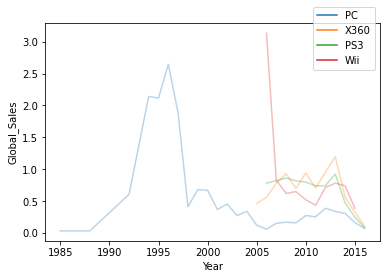

In [78]:
print("\nUm gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP.")
import seaborn as sns
import matplotlib.pyplot as plt

Platform_list = ["PS3", "Wii", "X360", "PC"]
dfp = df.loc[(df.Platform.isin(Platform_list))]

dfpp = dfp.groupby(["Year", "Platform"]).Global_Sales.mean().reset_index()
#dfpp["Year"] = pd.DatetimeIndex(dfpp["Year"]).year

  
sns.lineplot(x=dfpp["Year"],  y=dfpp['Global_Sales'], data=dfpp, hue='Platform', alpha=0.3)
plt.legend(bbox_to_anchor=(1,1.1))



In [43]:
dfp

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


In [ ]:
dflin=dfp.groupby('Year').Global_Sales.mean().reset_index()
fig = px.line(dflin, 
              x="Platform", 
              y="Global_Sales",
              title= 'Quantidade de vendas em média'
             )
fig.show()


In [ ]:
Questão 3

Considerando os dados do dataset fish.csv, faça uma análise exploratória dos dados, criando:

Vários gráficos (em uma mesma figura) combinando cada par de característica (feature) dos peixes, 
e atribuindo uma cor diferente para cada espécie.
Crie um gráfico de distribuição da largura dos peixes (Width). Não deixe de incluir o KDE.
Crie um mapa de calor que apresente a correlação entre cada feature do peixe.
Anote os dados no gráfico e utilize o cmap=coolwarm.



<AxesSubplot:>

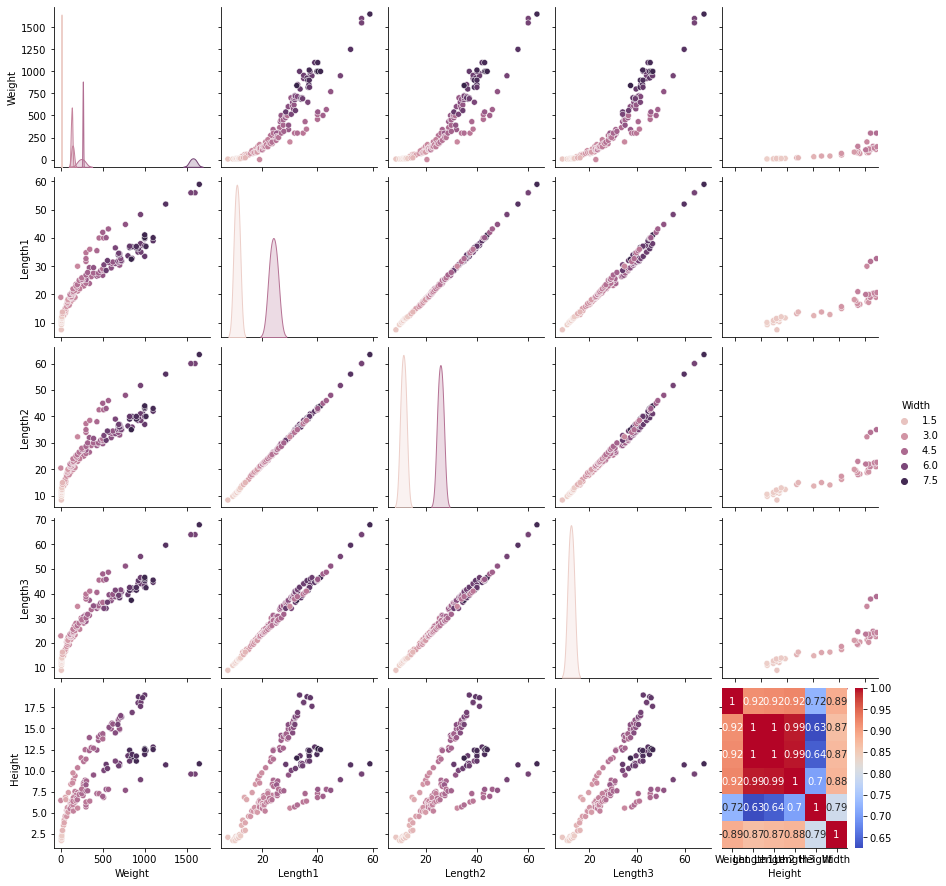

In [27]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets_avaliacao/fish.csv')

#Vários gráficos (em uma mesma figura) combinando cada par de característica (feature) dos peixes, 
#e atribuindo uma cor diferente para cada espécie.


#Crie um gráfico de distribuição da largura dos peixes (Width). Não deixe de incluir o KDE.
sns.pairplot(df, hue='Width')

#Crie um mapa de calor que apresente a correlação entre cada feature do peixe. 
#Anote os dados no gráfico e utilize o cmap=coolwarm.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


Crie um mapa de calor que apresente a correlação entre cada feature do peixe.
Anote os dados no gráfico e utilize o cmap=coolwarm.


<AxesSubplot:>

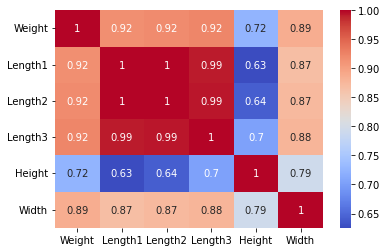

In [23]:
print("Crie um gráfico de distribuição da largura dos peixes (Width). Não deixe de incluir o KDE.")
sns.pairplot(df, hue='Width')

print("Crie um mapa de calor que apresente a correlação entre cada feature do peixe.")
print("Anote os dados no gráfico e utilize o cmap=coolwarm.")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
#df
df.groupby["Species"].Weight.mean()

df["Species"].astype(str)

#group_ano_cidade = sales.groupby(['YEAR_ID', 'COUNTRY']).SALES.sum().reset_index()


In [ ]:
sns.lineplot(x='YEAR_ID', y='SALES', data=group_ano_cidade, hue='COUNTRY', alpha=0.3)
plt.legend(bbox_to_anchor=(1,1.1))


In [ ]:
df.isnull().values.any()

In [ ]:
# Crie um gráfico de distribuição da largura dos peixes (Width). Não deixe de incluir o KDE.
sns.pairplot(df, hue='Width')


In [ ]:
4
Utilize os dados do arquivo salaries.csv 
para explorar as diferenças salariais entre homens e mulheres que estão em um mesmo posto. 
Por exemplo, Female Managers e Male Managers.



In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('./datasets_avaliacao/salarios.csv', sep=";")

fig = go.Figure()
fig.add_trace(go.Scatter(x=df["year"], y=df['femalesmanagers'], name='Females Managers'))
fig.add_trace(go.Scatter(x=df["year"], y=df['malemanagers'], name='Male Managers'))

fig.layout.update(title_text='Managers per Year', xaxis_rangeslider_visible=True)

fig.layout.update(
    xaxis=dict(
            showline=True,
            showticklabels=True,
            linecolor='rgb(0, 0, 0)',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Roboto',
                size=12,
                color='rgb(82,82,82)'),
        ),
    yaxis=dict(
            showline=True,
            showgrid=False,
            zeroline=True,
            showticklabels=True,
            ticks='outside',
            linecolor='rgb(0, 0, 0)',
            linewidth=2
        ),
    plot_bgcolor='rgb(255,255,255)',

)
fig.show()


In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["year"], y=df['femalesmanagers'], name='Females Managers'))
fig.add_trace(go.Scatter(x=df["year"], y=df['malemanagers'], name='Male Managers'))

fig.layout.update(title_text='Managers per Year', xaxis_rangeslider_visible=True)

fig.layout.update(
    xaxis=dict(
            showline=True,
            showticklabels=True,
            linecolor='rgb(0, 0, 0)',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Roboto',
                size=12,
                color='rgb(82,82,82)'),
        ),
    yaxis=dict(
            showline=True,
            showgrid=False,
            zeroline=True,
            showticklabels=True,
            ticks='outside',
            linecolor='rgb(0, 0, 0)',
            linewidth=2
        ),
    plot_bgcolor='rgb(255,255,255)',

)
fig.show()


In [31]:

fig = px.line(df, 
              x="year", 
              y="femalesmanagers",
              title = 'Females Managers per Year'
             )
fig.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   year                                      14 non-null     int64  
 1   females                                   14 non-null     object 
 2   femalesmanagers                           14 non-null     float64
 3   femaleprofessionals                       14 non-null     float64
 4   femaletechniciansandtradesworkers         14 non-null     float64
 5   femalecommunityandpersonalserviceworkers  14 non-null     float64
 6   femaleclericalandadministrativeworkers    14 non-null     float64
 7   femalesalesworkers                        14 non-null     float64
 8   femalemachineryoperatorsanddrivers        14 non-null     float64
 9   femalelabourers                           14 non-null     float64
 10  males                                   

In [8]:
df["MaleManagers]

,year,females,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers,...,malelabourers,persons,personmanagers,personprofessionals,persontechniciansandtradesworkers,personcommunityandpersonalserviceworkers,personclericalandadministrativeworkers,personsalesworkers,personmachineryoperatorsanddrivers,personlabourers
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,...,17.21,Persons,30.60,31.22,21.58,19.03,20.80,16.13,20.39,16.95
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,...,17.85,Persons,31.37,31.91,21.42,19.60,21.71,16.70,21.09,17.44
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,...,18.18,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.00,17.48
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,...,19.68,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,...,19.79,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85
5,2009,Females,33.30,34.72,20.19,21.00,23.81,18.02,21.46,17.90,...,19.96,Persons,38.57,37.10,25.68,22.25,24.93,19.38,25.05,19.21
6,2010,Females,34.41,35.52,22.86,21.97,25.74,19.15,22.74,19.18,...,21.69,Persons,38.73,38.14,27.23,23.50,27.04,20.58,26.82,20.83
7,2011,Females,35.22,36.48,23.19,23.25,26.85,19.87,22.92,19.82,...,22.16,Persons,40.62,40.65,28.42,24.26,28.31,21.41,26.74,21.32
8,2012,Females,36.24,37.72,23.95,23.52,28.35,20.82,24.46,20.99,...,24.18,Persons,41.28,41.07,29.90,25.25,29.47,22.16,28.52,22.99
9,2013,Females,37.26,38.95,23.90,24.50,28.38,21.61,25.02,21.75,...,24.25,Persons,41.99,41.66,29.81,25.88,29.84,22.67,29.36,23.32
